<a href="https://www.kaggle.com/code/kongkhamluangkhot/analyzing-most-sold-car-in-the-market?scriptVersionId=191751096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
pathFile = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pathFile = os.path.join(dirname, filename)
        print(pathFile)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-electric-car-data-washington-state/Electric_Vehicle_Data.csv


## Import Dataset

In [2]:
df = pd.read_csv(pathFile)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

## Cleaning Data

In [4]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [5]:
oldData = df.copy()
oldData.size

3084786

In [6]:
cleanData = df.dropna()
cleanData.size

3077935

In [7]:
print(oldData.size - cleanData.size)

6851


In [8]:
cleanData.duplicated().sum()

0

## Analysing Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Check all the County
cleanData['County'].unique()

array(['King', 'Thurston', 'Yakima', 'Kitsap', 'Snohomish', 'Island',
       'Skagit', 'Chelan', 'Kittitas', 'Whitman', 'Okanogan',
       'Walla Walla', 'Clark', 'Cowlitz', 'Jefferson', 'Stevens',
       'Clallam', 'Klickitat', 'Pierce', 'Franklin', 'Douglas', 'Whatcom',
       'Spokane', 'Mason', 'Grays Harbor', 'Benton', 'Pacific', 'Lewis',
       'San Juan', 'Skamania', 'Grant', 'Lincoln', 'Adams', 'Wahkiakum',
       'Pend Oreille', 'Columbia', 'Asotin', 'Ferry', 'Garfield'],
      dtype=object)

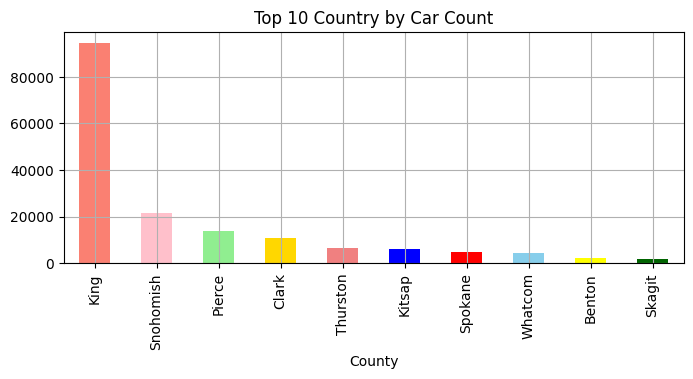

In [11]:
# Display the county that has the most car
topCounty = cleanData['County'].value_counts().head(10)

plt.figure(figsize=(8, 3))
topCounty.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'lightcoral', 'blue', 'red', 'skyblue', 'yellow', 'darkgreen'])
plt.title('Top 10 Country by Car Count')
plt.grid()
plt.show()

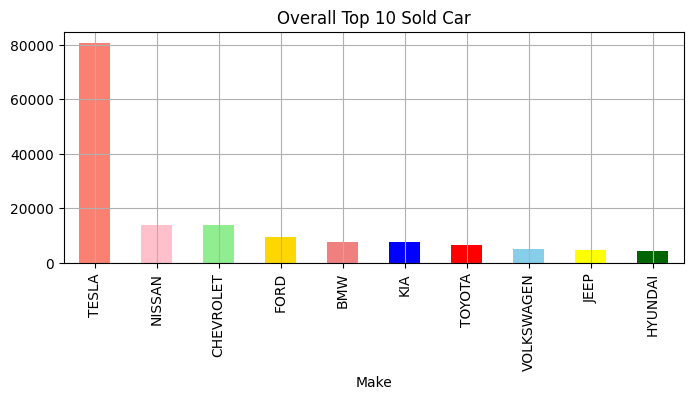

In [12]:
# Display the best selling car brand overall
topCar = cleanData['Make'].value_counts().head(10)

plt.figure(figsize=(8, 3))
topCar.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'lightcoral', 'blue', 'red', 'skyblue', 'yellow', 'darkgreen'])
plt.title('Overall Top 10 Sold Car')
plt.grid()
plt.show()

In [13]:
# Get a list of selling car brand in each county
df_county = cleanData.groupby('County')
df_countyByCar = df_county[['Make']].value_counts()

# Check the most selling car brand of each county
df_topCarByCounty = df_countyByCar.groupby('County').head(1).sort_values(ascending=False)
df_topCarByCounty
df_topCarByCounty.reset_index(level=1)

,Make,count
County,,
King,TESLA,45463
Snohomish,TESLA,11084
Pierce,TESLA,5851
Clark,TESLA,4401
Thurston,TESLA,2077
Kitsap,TESLA,1948
Spokane,TESLA,1746
Whatcom,TESLA,1308
Benton,TESLA,903


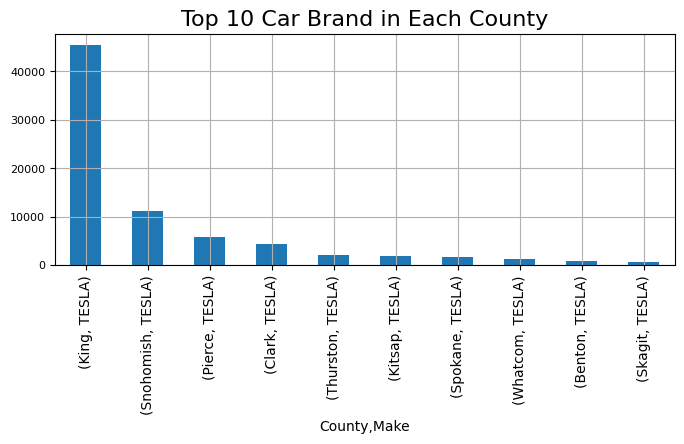

In [14]:
fig, ax = plt.subplots(figsize=(8, 3)) # set graph size
df_topCarByCounty[:10].plot(kind='bar')

# sns.barplot(data=df_topCarByCounty.reset_index(level=0).reset_index(level=0).head(10), x="County", y="count", width=0.8)

# Add a title for the legend
# ax.legend(title="Car Make", loc='upper left', bbox_to_anchor=(0.7, -0.15))

# Customize the plot further (optional)
plt.title("Top 10 Car Brand in Each County", fontsize = 16)
plt.yticks(rotation=0, fontsize = 8)
plt.grid()
plt.show()

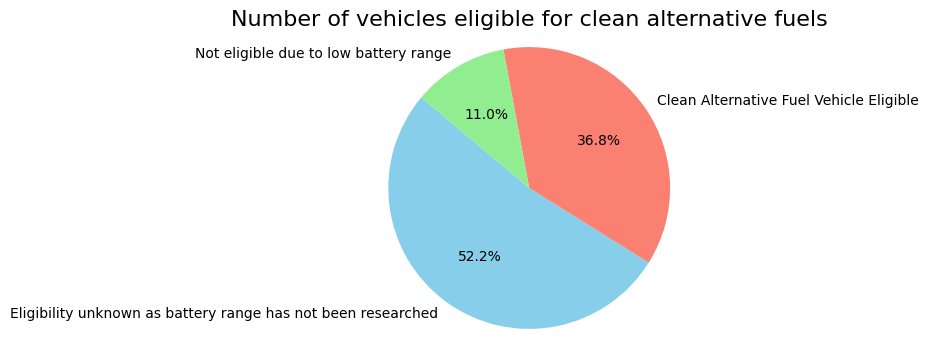

In [15]:
Data = cleanData['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
value_counts = Data.value_counts()
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']  

plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title("Number of vehicles eligible for clean alternative fuels", fontsize = 16)
plt.axis('equal')
plt.show()